# Multimodal Data Fusion's Project

## Score level fusing of face and voice for identity verification

Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt

#### Use following functions to compute the threshold and error in your code.

Computing Decision Threshold

In [2]:
def Threshold(Sample_N, Sample_P):
    scores = np.concatenate((Sample_N, Sample_P), axis=0)
    y = np.concatenate((np.zeros(len(Sample_N)), np.ones(len(Sample_P))), axis=0)
    
    fpr, tpr, thresholds = metrics.roc_curve(y, scores)
    fnr = 1 - tpr
    eer_threshold = thresholds[np.nanargmin(np.absolute((fnr - fpr)))]
    
    return eer_threshold

Computing Error

In [3]:
def ComputeERR(Sample_N, Sample_P, thr):
    fa = len(Sample_N[Sample_N>=thr])
    fr = len(Sample_P[Sample_P<thr])
    
    far = fa/len(Sample_N)
    frr = fr/len(Sample_P)
    hter = (far + frr)/ 2
    
    return hter, far, frr

### Verification Error for Face

In [4]:
wolves = pd.read_csv('.\Train_negative.csv')
sheep = pd.read_csv('.\Train_positive.csv')

wolves_f = wolves['face'].as_matrix()
sheep_f = sheep['face'].as_matrix()

THR = Threshold(wolves_f, sheep_f)
print('Threshold =', THR)

Threshold = 0.0936


C:\Users\Sicil\AppData\Local\Continuum\anaconda3\envs\Jupyter Machine Vision\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
C:\Users\Sicil\AppData\Local\Continuum\anaconda3\envs\Jupyter Machine Vision\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [5]:
[err, far, frr] = ComputeERR(wolves_f, sheep_f, THR)
print('Training Error=', err*100)

Training Error= 1.5


In [6]:
wolves_t = pd.read_csv('.\Test_negative.csv')
sheep_t = pd.read_csv('.\Test_positive.csv')

wolves_t_f = wolves_t['face'].as_matrix()
sheep_t_f = sheep_t['face'].as_matrix()

C:\Users\Sicil\AppData\Local\Continuum\anaconda3\envs\Jupyter Machine Vision\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
C:\Users\Sicil\AppData\Local\Continuum\anaconda3\envs\Jupyter Machine Vision\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [7]:
[err_t, far_t, frr_t] = ComputeERR(wolves_t_f, sheep_t_f, THR)
print('Test Error =', err_t*100)

Test Error = 1.7900268336314848


### Task 1: Verification Error from Voice
Use the voice scores to compute error for verification, i.e. ERR.

In [8]:
wolves_v = wolves['voice'].as_matrix()
sheep_v = sheep['voice'].as_matrix()

THR = Threshold(wolves_v, sheep_v)
print('Threshold =', THR)

[err, far, frr] = ComputeERR(wolves_v, sheep_v, THR)
print('Training Error=', err*100)

wolves_t_v = wolves_t['voice'].as_matrix()
sheep_t_v = sheep_t['voice'].as_matrix()

[err_t, far_t, frr_t] = ComputeERR(wolves_t_v, sheep_t_v, THR)
print('Test Error =', err_t*100)

Threshold = 3.154
Training Error= 0.8329166666666667
Test Error = 1.1393112701252237


C:\Users\Sicil\AppData\Local\Continuum\anaconda3\envs\Jupyter Machine Vision\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\Sicil\AppData\Local\Continuum\anaconda3\envs\Jupyter Machine Vision\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\Sicil\AppData\Local\Continuum\anaconda3\envs\Jupyter Machine Vision\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Sicil\AppData\Local\Continuum\anaconda3\envs\Jupyter Machine Vision\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.i

### Task 2: Verification Error from Face and Voice using a Simple Sum
Simply sum the scores of face and voice.

Threshold = 3.2636000000000003
Training Error = 0.18958333333333335
Test Error = 0.42397137745974955


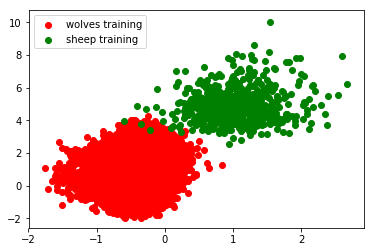

In [10]:
c1 = plt.scatter(wolves_f,wolves_v,c=('r'))
c2 = plt.scatter(sheep_f,sheep_v,c=('g'))
plt.legend([c1,c2], ['wolves training', 'sheep training'])

wolves_training_sum = wolves_f + wolves_v
sheep_training_sum = sheep_f + sheep_v

THR = Threshold(wolves_training_sum, sheep_training_sum)
print('Threshold =', THR)

[err, far, frr] = ComputeERR(wolves_training_sum, sheep_training_sum, THR)
print('Training Error =', err*100)

wolves_testing_sum = wolves_t_f + wolves_t_v
sheep_testing_sum = sheep_t_f + sheep_t_v
[err_t, far_t, frr_t] = ComputeERR(wolves_testing_sum, sheep_testing_sum, THR)
print('Test Error =', err_t*100)

### Task 3: Weighted Sum Fusion.
Use the training error of face and voice to weight the evaluation scores. 

Hint: The weights have to be inverse to the errors and sume to one.

In [11]:
training_error_face = 1.5 
training_error_voice = 0.8329166666666667 
weight_voice = training_error_face/(training_error_face + training_error_face)
weight_face = training_error_voice/(training_error_face + training_error_face)
print(weight_voice)
print(weight_face)
wolves_training_wsum = weight_face*wolves_f + weight_voice*wolves_v
sheep_training_wsum = weight_face*sheep_f + weight_voice*sheep_v

THR = Threshold(wolves_training_wsum, sheep_training_wsum)
print('Threshold =', THR)

[err, far, frr] = ComputeERR(wolves_training_wsum, sheep_training_wsum, THR)
print('Training Error =', err*100)

wolves_testing_wsum = weight_face*wolves_t_f + weight_voice*wolves_t_v
sheep_testing_wsum = weight_face*sheep_t_f + weight_voice*sheep_t_v
[err_t, far_t, frr_t] = ComputeERR(wolves_testing_wsum, sheep_testing_wsum, THR)
print('Test Error =', err_t*100)

0.5
0.27763888888888894
Threshold = 1.63224775
Training Error = 0.3204166666666667
Test Error = 0.6097942754919499


### Task 4: Implement One Classifier-based Fusion (SVM or Logistic Regression)
Use the training scores to train the classifier and the evaluation scores for classification and computing the error.

In the case of SVM, either the output probabilities can be considered as the fusion score for computing the error or simply the error is "1-accuracy".

For the logistic regression, the predicted values are the fusion scores. Classification labels should zero and one for the negative and the positive samples, respectively.

In [12]:
from sklearn.svm import SVC

training_data_negative=pd.DataFrame(wolves)
training_data_negative['result']=0 # define 0 as negative
training_data_wolves=training_data_negative.drop(columns='label') # remove 3rd column-'label'

training_data_positive=pd.DataFrame(sheep)
training_data_sheep=training_data_positive.drop(columns='label')# remove 3rd column-'label'
training_data_sheep['result']=1 # define 0 as negative

x = training_data_wolves.append(training_data_sheep, ignore_index=True)
y = x['result']
x = x.drop(columns='result')
x = x.as_matrix()
x = np.array(x)
y = y.as_matrix()
y = np.array(y)

clf = SVC(kernel='linear',probability=True)
clf.fit(x,y)

testing_data_negative=pd.DataFrame(wolves_t)
testing_data_wolves=testing_data_negative.drop(columns='label') # remove 3rd column-'label'
testing_data_wolves['result']=0


testing_data_positive=pd.DataFrame(sheep_t)
testing_data_sheep=testing_data_positive.drop(columns='label') # remove 3rd column-'label'
testing_data_sheep['result']=1

x_test = testing_data_wolves.append(testing_data_sheep, ignore_index=True)
y_test = x_test['result']
x_test = x_test.drop(columns='result')

y_pred = clf.predict_proba(x_test)
y_accuracy = clf.score(x_test,y_test)

print(y_accuracy)
wolves_testing_proba = y_pred[:,0]
sheep_testing_proba = y_pred[:,1]

wolves_testing_proba = 1-wolves_testing_proba
sheep_testing_proba = 1-sheep_testing_proba

THR = Threshold(wolves_testing_proba, sheep_testing_proba)
print('Threshold=', THR)

[err, far, frr] = ComputeERR(wolves_testing_proba, sheep_testing_proba, THR)
print('Testing Error =', err*100)


C:\Users\Sicil\AppData\Local\Continuum\anaconda3\envs\Jupyter Machine Vision\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\Sicil\AppData\Local\Continuum\anaconda3\envs\Jupyter Machine Vision\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()


0.9997058823529412
Threshold= 0.5076300226526023
Testing Error = 0.38146167557932265


### Task 5: One Density-based Score Fusion
Use the training scores for estimating the authentic (f_Sample_P) and imposter (f_Sample_N) densities. Then, use the ratio f_Sample_P(Test)/f_Sample_N(Test) as the fusion.

Hint: Examples of density estimation approaches are Gaussian, Mixture of Gaussian, Kernel Density Estimation, etc.

In [ ]:
from sklearn.neighbors import KernelDensity

kde_wolves = KernelDensity(kernel = 'gaussian',bandwidth = 2.0).fit(training_data_wolves)
kde_sheep = KernelDensity(kernel = 'gaussian',bandwidth = 2.0).fit(training_data_sheep)

testing_data_wolves = pd.DataFrame(training_data_wolves)
testing_data_sheep = pd.DataFrame(training_data_sheep)

LR_wolves_score= kde_sheep.score_samples(testing_data_sheep)/kde_wolves.score_samples(testing_data_sheep)
LR_sheep_score= kde_sheep.score_samples(testing_data_wolves)/kde_wolves.score_samples(testing_data_wolves)

THR = Threshold(LR_wolves_score, LR_sheep_score)
print('Threshold=', THR)

[err, far, frr] = ComputeERR(LR_wolves_score, LR_sheep_score, THR)
print('Testing Error =', err*100)
